In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import warnings 
# ignores all warning messages
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import datetime
import sys
import time
import matplotlib.pyplot as ma
import statsmodels.tsa.seasonal as st
import statsmodels.tsa.arima_model as arima
import statsmodels.tsa.stattools as tools

df = pd.read_csv("/root/JACOBS_UNIVERSITY/Master_Thesis_2020/combined.csv")
df = df[df.columns[0:2]]

# apply interpolation to create continuity in dataset 
df = df.interpolate(method="cubic")

# remove spaces from string right and left sie " xxx " -> "xxx"
df['cet_timestamp'] = df['cet_timestamp'].apply(lambda x: x.strip())

# converts dataframe column "cet_timestampe" to datetime
df['cet_timestamp'] = df['cet_timestamp'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d.%m.%Y %H:%M'))

df = df.set_index("cet_timestamp") # set time as index
dd=df.resample('D').sum()
dd_size = len(dd[-800:]) * 0.98 # take 95 of the data starting from 17538
# splitting data to train and test
dd_train, dd_test = dd[:int(dd_size)], dd[int(dd_size):]
print(dd_train.shape) 
print(dd_test.shape)

print("Averaged Daily Ahead Price:",dd)




(784, 1)
(312, 1)
Averaged Daily Ahead Price:                Day-ahead Price [EUR/MWh]
cet_timestamp                           
2016-01-01                        567.80
2016-01-02                        562.34
2016-01-03                        430.53
2016-01-04                        671.41
2016-01-05                        812.06
...                                  ...
2018-12-27                       1476.15
2018-12-28                       1460.14
2018-12-29                       1282.76
2018-12-30                       1135.95
2018-12-31                       1327.72

[1096 rows x 1 columns]


In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import warnings 
# ignores all warning messages
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import datetime
import sys
import time
import matplotlib.pyplot as ma
import statsmodels.tsa.seasonal as st
import statsmodels.tsa.arima_model as arima
import statsmodels.tsa.stattools as tools

df = pd.read_csv("/root/JACOBS_UNIVERSITY/Master_Thesis_2020/combined.csv")
df = df[df.columns[0:2]]

# apply interpolation to create continuity in dataset 
df = df.interpolate(method="cubic")

# remove spaces from string right and left sie " xxx " -> "xxx"
df['cet_timestamp'] = df['cet_timestamp'].apply(lambda x: x.strip())

# converts dataframe column "cet_timestampe" to datetime
df['cet_timestamp'] = df['cet_timestamp'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d.%m.%Y %H:%M'))

df = df.set_index("cet_timestamp") # set time as index
dd=df.resample('D').sum()
dd_size = len(df[-800:]) * 0.95 # take 95 of the data starting from 17538
# splitting data to train and test
dd_train, dd_test = dd[:int(dd_size)], dd[int(dd_size):]
print(dd_train.shape) 
print(dd_test.shape)
print(dd.size)
print("Averaged Daily Ahead Price:",dd)




(760, 1)
(336, 1)
1096
Averaged Daily Ahead Price:                Day-ahead Price [EUR/MWh]
cet_timestamp                           
2016-01-01                        567.80
2016-01-02                        562.34
2016-01-03                        430.53
2016-01-04                        671.41
2016-01-05                        812.06
...                                  ...
2018-12-27                       1476.15
2018-12-28                       1460.14
2018-12-29                       1282.76
2018-12-30                       1135.95
2018-12-31                       1327.72

[1096 rows x 1 columns]


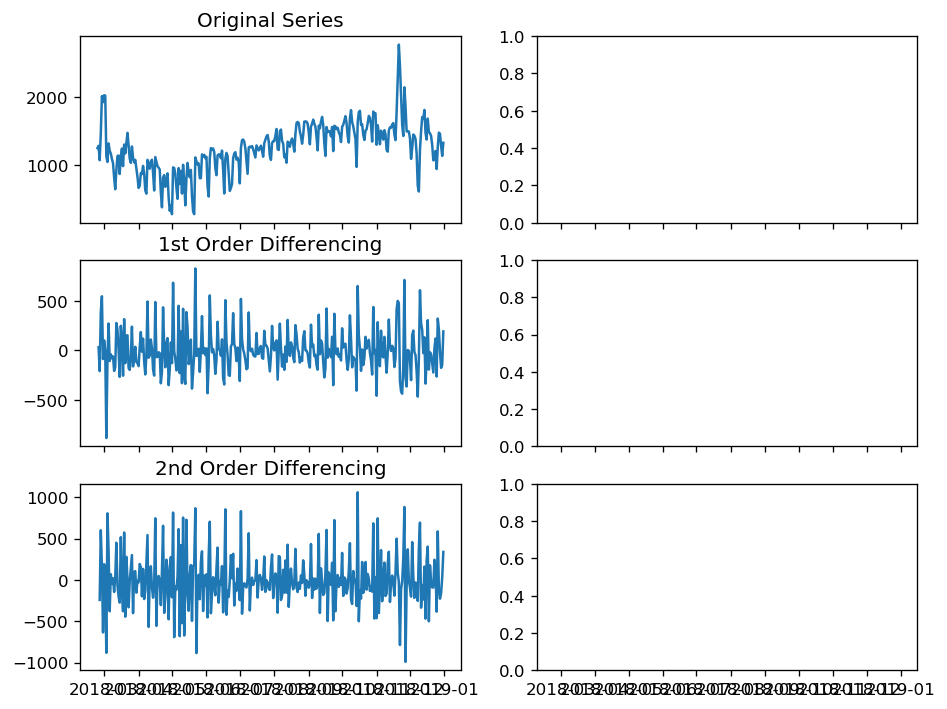

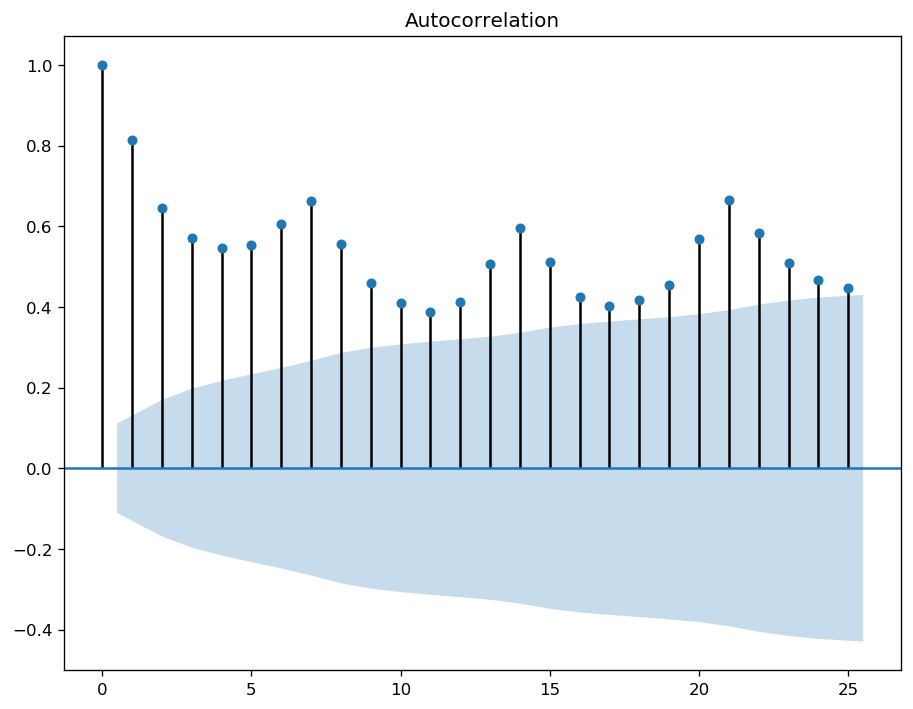

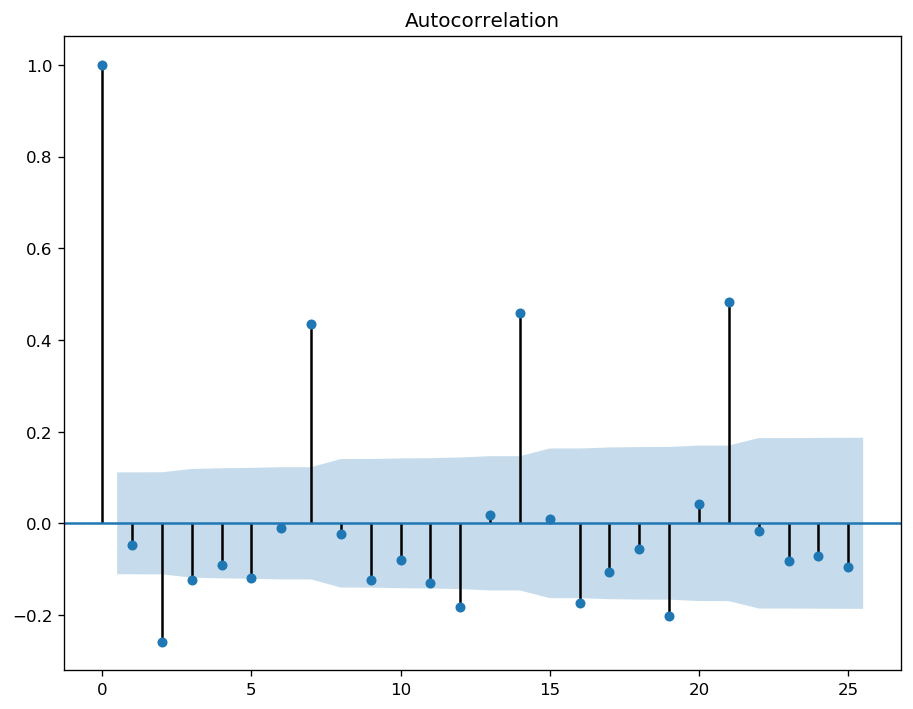

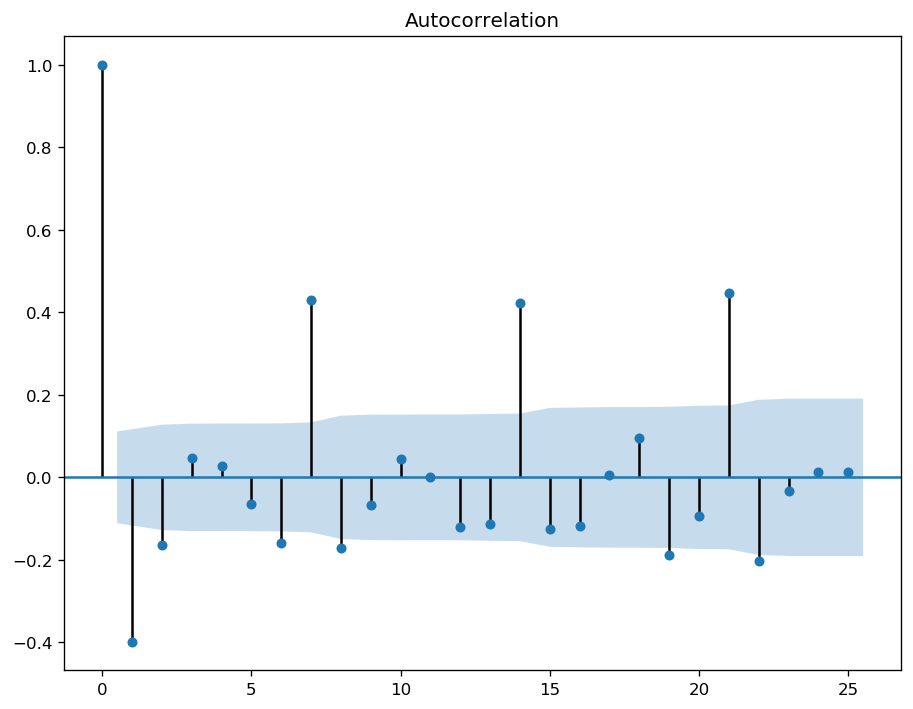

In [51]:
# import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
price="Day-ahead Price [EUR/MWh]"
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dd_test[price]); axes[0, 0].set_title('Original Series')
plot_acf(dd_test[price])

# 1st Differencing
axes[1, 0].plot(dd_test[price].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dd_test[price].diff().dropna())

# 2nd Differencing
axes[2, 0].plot(dd_test[price].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dd_test[price].diff().diff().dropna())
plt.show()

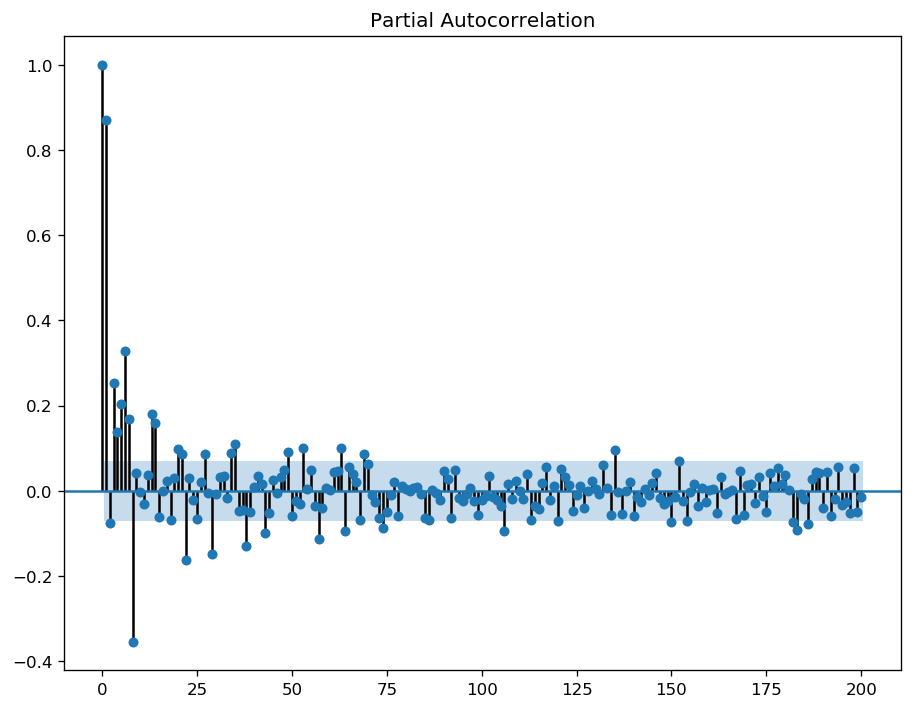

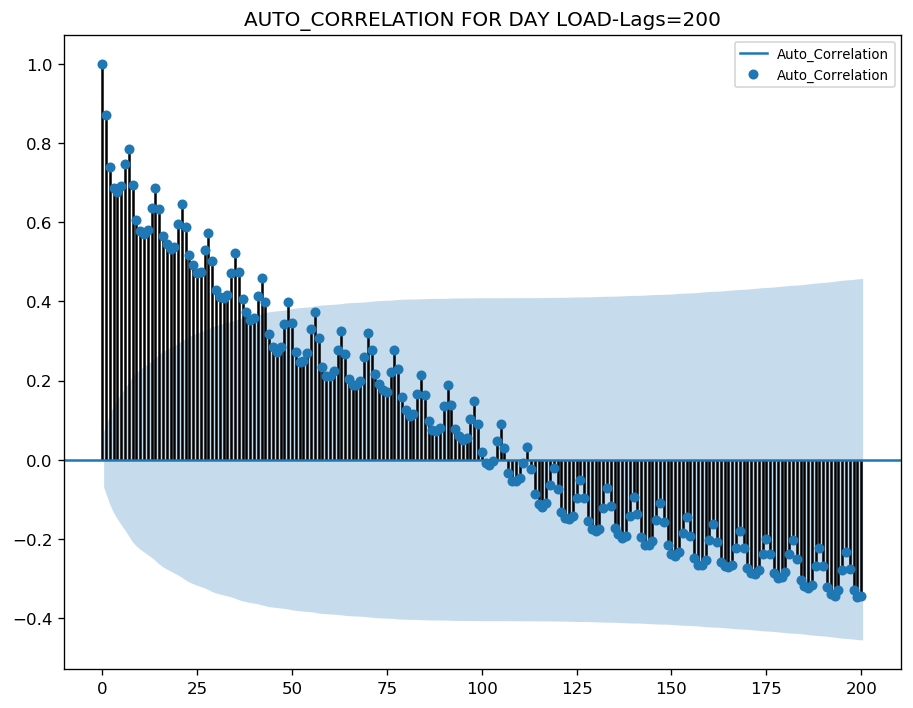

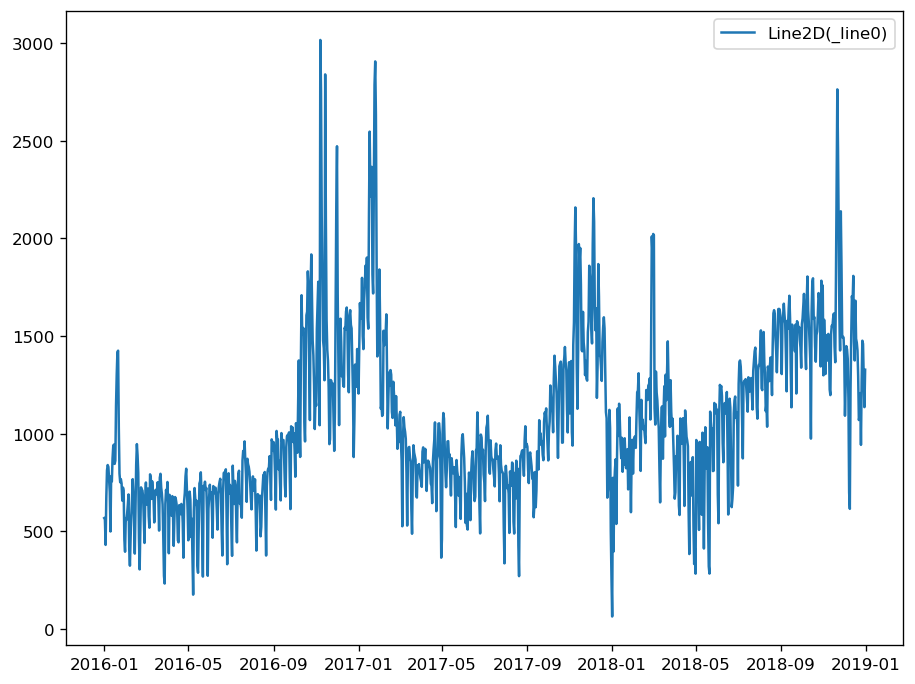

In [53]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
#plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':120})

dd_day = dd_train[price]

# Original Series
plot_pacf(dd_day, lags=200,label="Partial Autocorrelation")
plot_acf(dd_day, lags= 200,label="Auto_Correlation")
plt.legend(loc='upper right', fontsize=8)
plt.title("AUTO_CORRELATION FOR DAY LOAD-Lags=200")
fig, ax = plt.subplots()
lines = ax.plot(dd)
ax.legend(lines)
plt.show()

(0, 0, 0) 2660.6254115312495
(0, 0, 1) 2660.6254115312495
(0, 0, 2) 2660.6254115312495
(0, 0, 3) 2660.6254115312495
(0, 0, 4) 2660.6254115312495
(0, 0, 5) 2660.6254115312495
(0, 1, 0) 2660.6254115312495
(0, 1, 1) 2660.6254115312495
(0, 1, 2) 2660.6254115312495
(0, 1, 3) 2660.6254115312495
(0, 1, 4) 2660.6254115312495
(0, 1, 5) 2660.6254115312495
(0, 2, 0) 2660.6254115312495
(0, 2, 1) 2660.6254115312495
(0, 2, 2) 2660.6254115312495
(0, 2, 3) 2660.6254115312495
(0, 2, 4) 2660.6254115312495
(0, 2, 5) 2660.6254115312495
(0, 3, 0) 2660.6254115312495
(0, 3, 1) 2660.6254115312495
(0, 3, 2) 2660.6254115312495
(0, 3, 3) 2660.6254115312495
(0, 3, 4) 2660.6254115312495
(0, 3, 5) 2660.6254115312495
(0, 4, 0) 2660.6254115312495
(0, 4, 1) 2660.6254115312495
(0, 4, 2) 2660.6254115312495
(0, 4, 3) 2660.6254115312495
(0, 4, 4) 2660.6254115312495
(0, 4, 5) 2660.6254115312495
(0, 5, 0) 2660.6254115312495
(0, 5, 1) 2660.6254115312495
(0, 5, 2) 2660.6254115312495
(0, 5, 3) 2660.6254115312495
(0, 5, 4) 2660

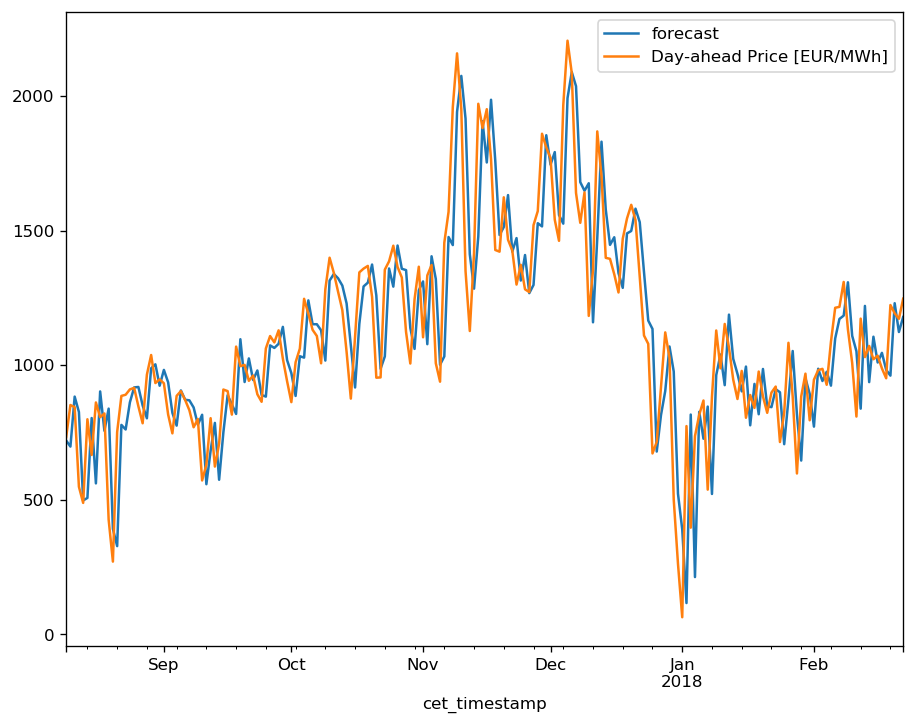

196
4
ARIMA(1, 0, 1) MSE=10122.929
196
4
ARIMA(1, 0, 2) MSE=6216.857
196
4
ARIMA(1, 0, 3) MSE=5318.026
196
4
ARIMA(1, 1, 1) MSE=2624.205
196
4
ARIMA(1, 1, 2) MSE=2673.238
196
4
ARIMA(1, 1, 3) MSE=2609.788
196
4
196
4
196
4
196
4
ARIMA(2, 0, 1) MSE=12297.903
196
4
ARIMA(2, 0, 2) MSE=4937.847
196
4
ARIMA(2, 0, 3) MSE=4966.150
196
4
ARIMA(2, 1, 1) MSE=3214.587
196
4
ARIMA(2, 1, 2) MSE=6042.736
196
4
ARIMA(2, 1, 3) MSE=5726.363
196
4
ARIMA(2, 2, 1) MSE=1393.226
196
4
196
4
Best ARIMA(2, 2, 1) MSE=1393.226


In [54]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

p=d=q = range(0,6)
pdq = list(itertools.product(p,d,q))
for param in pdq:
    try:
        model = ARIMA(dd_train[-200:][price], order=(2, 2, 1))
        model_fit = model.fit()
        print(param, model_fit.aic)
    except:
        continue

model = ARIMA(dd_train[-200:][price], order=(2,2,1))
model_fit = model.fit()
model_fit.plot_predict(dynamic=False)
plt.show()

import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.98)
    train, test = X[0:train_size], X[train_size:]
    print(len(train))
    print(len(test))
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [1, 2]
d_values = range(0, 3)
q_values = range(1, 4)
warnings.filterwarnings("ignore")
evaluate_models(dd[price][760:960], p_values, d_values, q_values)